In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt

from tenpy.networks.mps import MPS

from modules.myDMRG import SimpleDMRGEngine_Boson, myModel
from modules.myDMRG import structure_factor, g_2, B_1, E_k, n_k

***

## Reproducing Results
***

In [149]:
## CALCULATING THE GROUND STATES for t=0
L = 48
t = 1
V = 100
avg_n = 1/4

fig1_Vfix = dict() # value -> rc, key -> (engine, model_params)

for rc in [2,3,4]:
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, bc_MPS='finite', bc_x='periodic')
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig1_Vfix[str(rc)] = (engine, model_params)

In [150]:
## CALCULATING THE MPS for V/t=6
L = 48
t = 1
V = 6
avg_n = 1/4

fig1_Vfix6 = dict() # value -> rc, key -> (engine, model_params)

for rc in [2,3,4]:
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig1_Vfix6[str(rc)] = (engine, model_params)

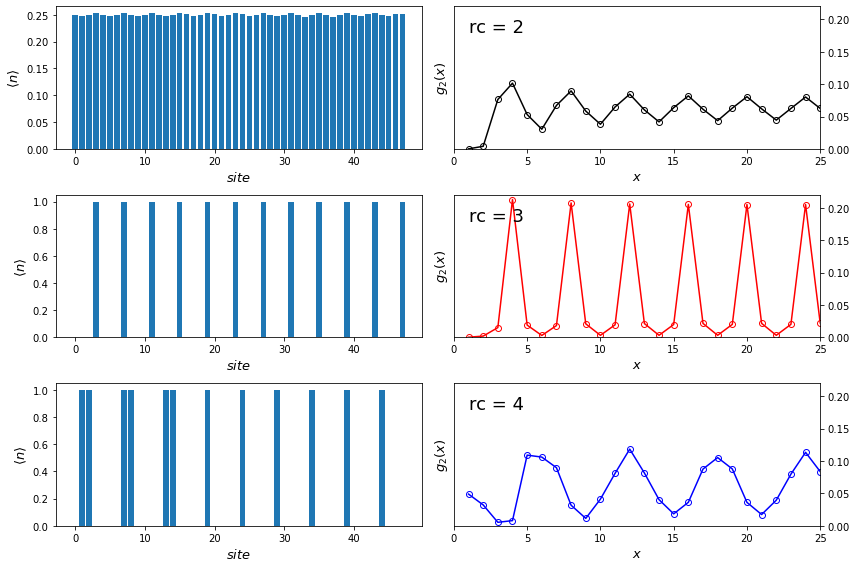

In [151]:
fig, ax = plt.subplots(3, 2, figsize=[12,8])
mycolors = ['black', 'red', 'blue']
for count, i in enumerate([2,3,4]):
    psi_sx = fig1_Vfix[str(i)][0].psi
    psi_dx = fig1_Vfix6[str(i)][0].psi
    #xlim_sx = [22,40]
    #x = np.linspace(xlim_sx[0],xlim_sx[1],1000)
    #gs = ground_state[str(i)][0]
    #mask = gs == 1
    #ax[count,0].plot(np.arange(L)[mask], ground_state[str(i)][0][mask], 'o')
    #ax[count,0].plot(x, 1-np.cos(x*np.pi*2)/20)
    #ax[count,0].set_xlim(xlim_sx)
    #ax[count,0].set_ylim(0.9,1.2)
    ax[count,1].plot(np.arange(1,psi_dx.L),g_2(psi_dx, fig1_Vfix6[str(i)][1])[1:], 
                     '-o', markerfacecolor='none', color=mycolors[count])
    ax[count,1].set_xlim(0,25)
    ax[count,1].set_ylim(0,0.22)
    ax[count,0].bar(range(psi_sx.L), psi_sx.expectation_value('N'))
    ax[count,0].set_xlabel('$site$', fontsize=13)
    ax[count,0].set_ylabel(r'$\langle n \rangle$', fontsize=13)
    ax[count,1].set_xlabel('$x$', fontsize=13)
    ax[count,1].set_ylabel('$g_2(x)$', fontsize=13)
    ax[count,1].yaxis.tick_right()
    ax[count,1].text(1, 0.18, 'rc = '+str(i), fontsize=18)
    #ax[count,1].yaxis.set_label_position('right')
plt.tight_layout()
plt.show()

In [153]:
## CALCULATING THE MPS FOR rc=4 
L = 48
t = 1
rc = 4
avg_n = 3/4

fig2_RCfix4 = dict() # value -> V, key -> (engine, model_params)

for V in [1, 3, 5, 100]:
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig2_RCfix4[str(V)] = (engine, model_params)

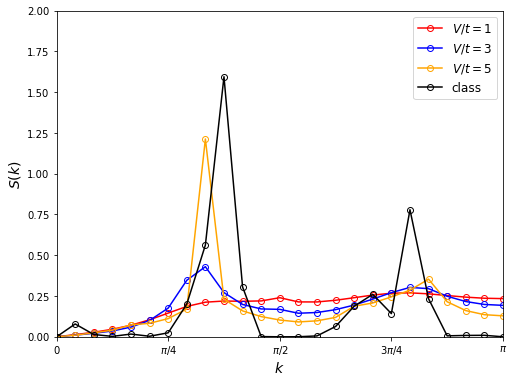

In [154]:
plt.figure(figsize=[8,6])
mycolors = {'1': 'red',
            '3': 'blue',
            '5': 'orange',
            '100': 'black'}
k = np.linspace(0,np.pi,25)

#class_model_params = dict(L=48, n_max=1, t=1, V=1, rc=4, conserve='N', 
#                    filling=3/4, bc_MPS='finite', bc_x='periodic')
#class_M = myModel(class_model_params)
#class_prod_state = ((['vac']+['1']*4)*2 + ['vac','vac']+['1']*4)*3
#class_psi = MPS.from_product_state(class_M.lat.mps_sites(), 
#                             class_prod_state, bc=class_M.lat.bc_MPS)
for key,val in fig2_RCfix4.items():
    lab = '$V/t = $'+ key
    if (key=='100'): lab = 'class'
    plt.plot(k,np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
#plt.plot(k,np.real(structure_factor(k, class_psi, class_model_params)), 
#         label='class', marker='o', color='black')
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,2)
plt.xlim(0,np.pi)
plt.ylabel('$S(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

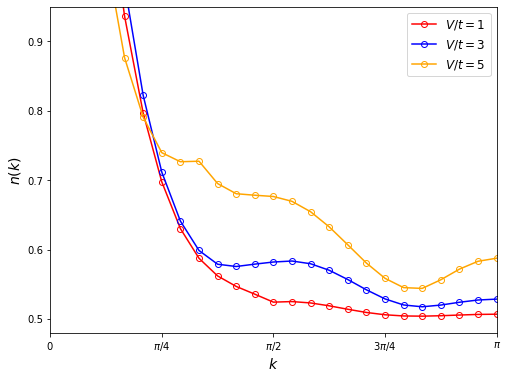

In [155]:
plt.figure(figsize=[8,6])
k = np.linspace(0,np.pi,25)
for key,val in fig2_RCfix4.items():
    if (key=='100'): continue
    lab = '$V/t = $'+ key
    plt.plot(k,np.real(n_k(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0.48,0.95)
plt.xlim(0,np.pi)
plt.ylabel('$n(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [156]:
## CALCULATING THE MPS for V/t=1.5
#L = 48
t = 1
V = 1.5
avg_n = 3/4

fig2_Vfix1_5 = dict() # value -> rc, key -> (engine, model_params)

for rc,L in zip([1,2,3,4,5],[48,48,48,48,40]):
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig2_Vfix1_5[str(rc)] = (engine, model_params)

In [157]:
## CALCULATING THE MPS for V/t=3
#L = 48
t = 1
V = 3
avg_n = 3/4

fig2_Vfix3 = dict() # value -> rc, key -> (engine, model_params)

for rc,L in zip([0,2,5],[48,48,40]):
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig2_Vfix3[str(rc)] = (engine, model_params)

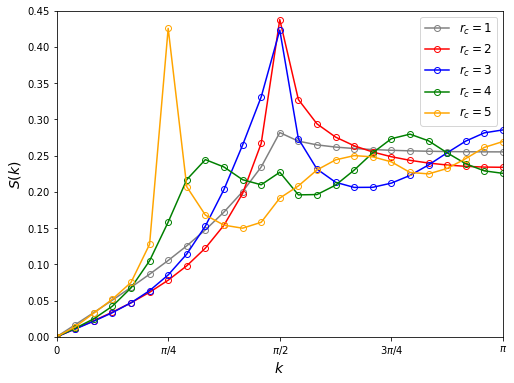

In [158]:
plt.figure(figsize=[8,6])
mycolors = {'1': 'grey',
            '2': 'red',
            '3': 'blue',
            '4': 'green',
            '5': 'orange',
            '100': 'black'}
k = np.linspace(0,np.pi,25)
for key,val in fig2_Vfix1_5.items():
    lab = '$r_c = $'+ key
    plt.plot(k,np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,0.45)
plt.xlim(0,np.pi)
plt.ylabel('$S(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

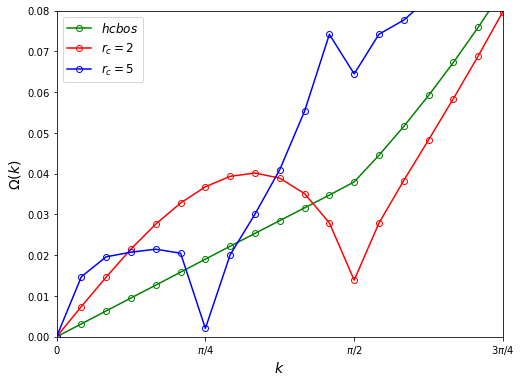

In [159]:
plt.figure(figsize=[8,6])
mycolors = {'0': 'green',
            '2': 'red',
            '5': 'blue'}
k = np.linspace(0,np.pi,25)
for key,val in fig2_Vfix3.items():
    lab = '$r_c = $'+ key
    if (key=='0'): lab='$hc bos$'
    plt.plot(k,E_k(k, val[0].psi, val[1])/np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,0.08)
plt.xlim(0,np.pi*3/4)
plt.ylabel(r'$\Omega(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
#plt.xticks(plt.xticks()[0],[r"$" + format(r/np.pi, ".2g")+ r"\pi$" for r in plt.xticks()[0]])
plt.legend(fontsize=12)
plt.show()

In [160]:
## CALCULATING THE MPS FOR rc=4 
L = 16
t = 1
rc = 4
avg_n = 3/4

fig4_RCfix4 = dict() # value -> V, key -> (engine, model_params)

for V in [6,15,24]:
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic', ryd=True)
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig4_RCfix4[str(V)] = (engine, model_params)
    
model_params = dict(L=L, n_max=1, t=t, V=6, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
M = myModel(model_params)
product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
random.shuffle(product_state)
psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)

engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
run_param = {'max_sweep': 15,
         'eps': 1e-4,
         'V': model_params['V']}
engine.run(run_param)
fig4_RCfix4['box'] = (engine, model_params)

In [161]:
## CALCULATING THE MPS FOR rc=4 
L = 48
t = 1
rc = 4
avg_n = 3/4

fig10_RCfix4 = dict() # value -> V, key -> (engine, model_params)

for V in [0.5, 1, 1.5, 2, 2.5, 3, 4]:
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig10_RCfix4[str(V)] = (engine, model_params)

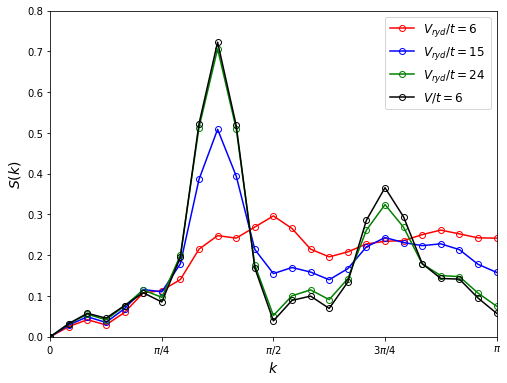

In [163]:
plt.figure(figsize=[8,6])
mycolors = {'6': 'red',
            '15': 'blue',
            '24': 'green',
            'box': 'black'}
k = np.linspace(0,np.pi,25)

for key,val in fig4_RCfix4.items():
    lab = '$V_{ryd}/t = $'+ key
    if (key=='box'): lab = '$V/t = 6$'
    plt.plot(k,np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
#plt.plot(k,np.real(structure_factor(k, class_psi, class_model_params)), 
#         label='class', marker='o', color='black')
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,0.8)
plt.xlim(0,np.pi)
plt.ylabel('$S(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

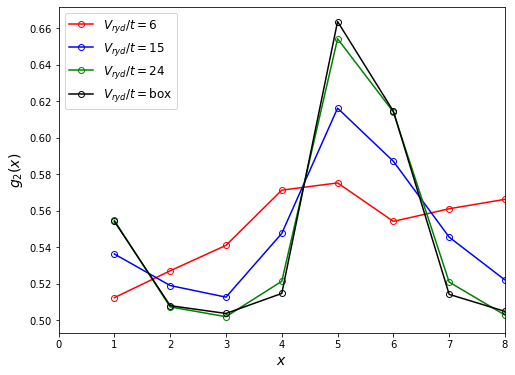

In [174]:
plt.figure(figsize=[8,6])
mycolors = {'6': 'red',
            '15': 'blue',
            '24': 'green',
            'box': 'black'}

for key,val in fig4_RCfix4.items():
    lab = '$V_{ryd}/t = $'+ key
    if (key=='100'): lab = '$V/t = 6$'
    plt.plot(np.arange(1,val[1]['L']), g_2(val[0].psi, val[1])[1:], label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
#plt.ylim(0,0.2)
plt.xlim(0,8)
plt.ylabel('$g_2(x)$', fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

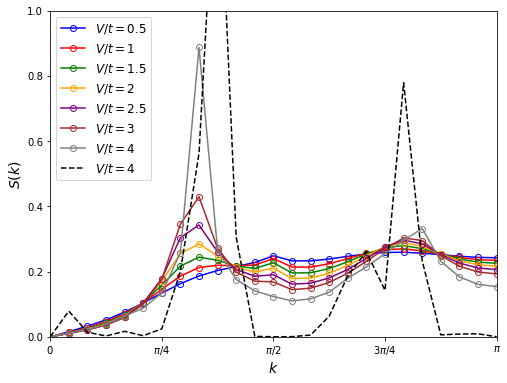

In [176]:
plt.figure(figsize=[8,6])
mycolors = {'1': 'red',
            '0.5': 'blue',
            '1.5': 'green',
            '2' : 'orange',
            '2.5' : 'purple',
            '3' : 'brown',
            '4' : 'grey'}
k = np.linspace(0,np.pi,25)

for key,val in fig10_RCfix4.items():
    lab = '$V/t = $'+ key
    plt.plot(k,np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])

plt.plot(k,np.real(structure_factor(k, fig2_RCfix4['100'][0].psi, fig2_RCfix4['100'][1])), label=lab,
         ls='--', color='black')
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,1)
plt.xlim(0,np.pi)
plt.ylabel('$S(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [177]:
## PRODUCE FIG 12 and 13

In [178]:
## CALCULATING THE MPS FOR rc=4 
L = 16
t = 1
rc = 4
avg_n = 1/4

fig4_RCfix4_bis = dict() # value -> V, key -> (engine, model_params)

for V in [6,15,24]:
    model_params = dict(L=L, n_max=1, t=t, V=V, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic', ryd=True)
    M = myModel(model_params)
    product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
    random.shuffle(product_state)
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    
    engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
    run_param = {'max_sweep': 15,
             'eps': 1e-4,
             'V': model_params['V']}
    engine.run(run_param)
    fig4_RCfix4_bis[str(V)] = (engine, model_params)
    
model_params = dict(L=L, n_max=1, t=t, V=6, rc=rc, conserve='N', filling=avg_n, 
                        bc_MPS='finite', bc_x='periodic')
M = myModel(model_params)
product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
random.shuffle(product_state)
psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)

engine = SimpleDMRGEngine_Boson(psi, M, chi_max=50)
run_param = {'max_sweep': 15,
         'eps': 1e-4,
         'V': model_params['V']}
engine.run(run_param)
fig4_RCfix4_bis['box'] = (engine, model_params)

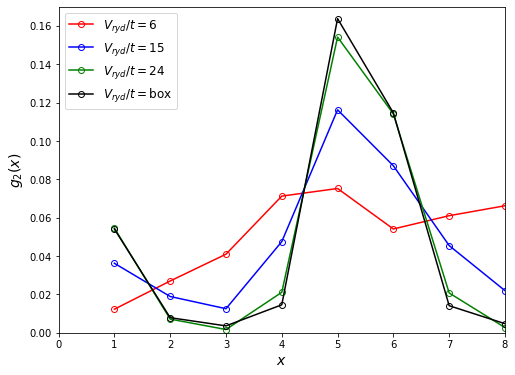

In [180]:
plt.figure(figsize=[8,6])
mycolors = {'6': 'red',
            '15': 'blue',
            '24': 'green',
            'box': 'black'}

for key,val in fig4_RCfix4_bis.items():
    lab = '$V_{ryd}/t = $'+ key
    if (key=='100'): lab = '$V/t = 6$'
    plt.plot(np.arange(1,val[1]['L']), g_2(val[0].psi, val[1])[1:], label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
plt.ylim(0,0.17)
plt.xlim(0,8)
plt.ylabel('$g_2(x)$', fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

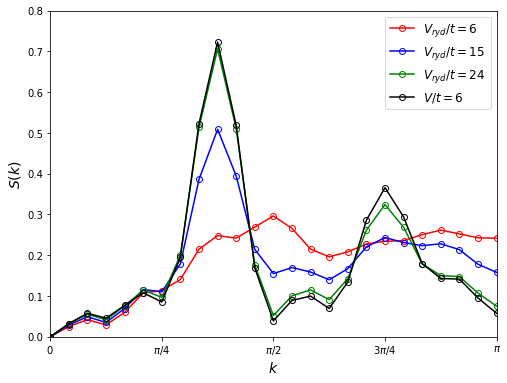

In [181]:
plt.figure(figsize=[8,6])
mycolors = {'6': 'red',
            '15': 'blue',
            '24': 'green',
            'box': 'black'}
k = np.linspace(0,np.pi,25)

for key,val in fig4_RCfix4_bis.items():
    lab = '$V_{ryd}/t = $'+ key
    if (key=='box'): lab = '$V/t = 6$'
    plt.plot(k,np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
#plt.plot(k,np.real(structure_factor(k, class_psi, class_model_params)), 
#         label='class', marker='o', color='black')
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,0.8)
plt.xlim(0,np.pi)
plt.ylabel('$S(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

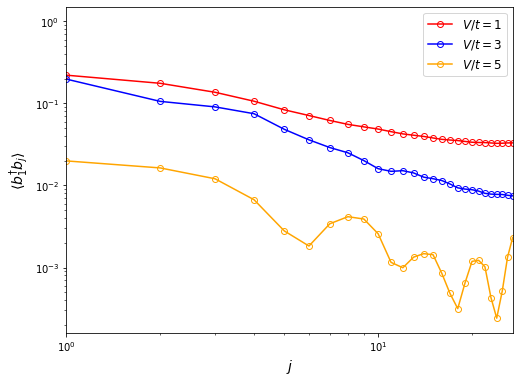

In [195]:
plt.figure(figsize=[8,6])
mycolors = {'1': 'red',
            '3': 'blue',
            '5': 'orange',
            '100': 'black'}
for key,val in fig2_RCfix4.items():
    if (key=='100'): continue
    lab = '$V/t = $'+ key
    plt.plot(B_1(val[0].psi, val[1]), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
#plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
#           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
#plt.ylim(0.48,0.95)
plt.xlim(1,27)
plt.ylabel(r'$\langle b^\dag _1 b_j \rangle$', fontsize=14)
plt.xlabel('$j$', fontsize=14)
plt.legend(fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.show()

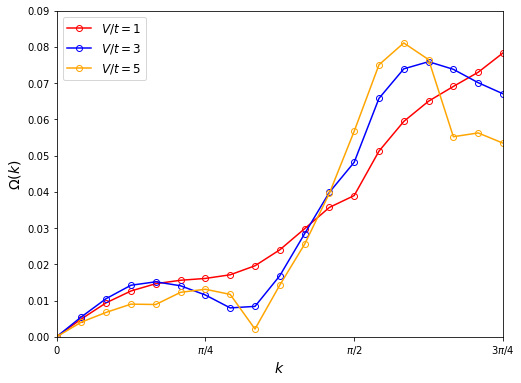

In [201]:
plt.figure(figsize=[8,6])
mycolors = {'1': 'red',
            '3': 'blue',
            '5': 'orange',
            '100': 'black'}
k = np.linspace(0,np.pi,25)
for key,val in fig2_RCfix4.items():
    if (key=='100'): continue
    lab = '$V/t = $'+ key
    if (key=='0'): lab='$hc bos$'
    plt.plot(k,E_k(k, val[0].psi, val[1])/np.real(structure_factor(k, val[0].psi, val[1])), label=lab,
             marker='o', markerfacecolor='none', color=mycolors[key])
plt.xticks(ticks=[0,np.pi/4, np.pi/2,np.pi*3/4, np.pi],
           labels=['$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$',])
plt.ylim(0,0.09)
plt.xlim(0,np.pi*3/4)
plt.ylabel(r'$\Omega(k)$', fontsize=14)
plt.xlabel('$k$', fontsize=14)
plt.legend(fontsize=12)
plt.show()